In this assignment, we will plot the money we would have if we had bought an iPod's worth of shares on the iPod launch date. First, we import the requisite libraries.

In [17]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import datetime

We will now interface with the yahoo ichart APIs to download Apple, Microsoft, and IBM historic share data, from 2001 October 23 (The release date of the iPod), to today. (Due to what seems like a bug, we must ask for the data starting September 23 instead of October 23)
The data is saved as an array of panda dataframes (basically arrays). 
This cell will display the first dataframe, which represents Apple's historic share data.

In [34]:
root_url = "http://ichart.finance.yahoo.com/table.csv?s="
companies_to_look_at = ["AAPL", "MSFT", "IBM"] #Stock ticker symbols for companies being investigated
from_date = "&a=09&b=23&c=2001"
today = datetime.datetime.now()
end_date = "&d=" + str(today.month) +"&e=" + str(today.day) + "&f=" + str(today.year)
data = []
for company in companies_to_look_at:
    url = root_url + company + from_date + end_date +"&g=d&ignore=.csv"
    data.append(pd.read_csv(url, index_col = 0))
data[0]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-15,98.919998,99.300003,98.500000,98.779999,29952500,98.779999
2016-07-14,97.389999,98.989998,97.320000,98.790001,38348800,98.790001
2016-07-13,97.410004,97.669998,96.839996,96.870003,25655000,96.870003
2016-07-12,97.169998,97.699997,97.120003,97.419998,23889600,97.419998
2016-07-11,96.750000,97.650002,96.730003,96.980003,23298900,96.980003
2016-07-08,96.489998,96.889999,96.050003,96.680000,28855800,96.680000
2016-07-07,95.699997,96.500000,95.620003,95.940002,24280900,95.940002
2016-07-06,94.599998,95.660004,94.370003,95.529999,30770700,95.529999
2016-07-05,95.389999,95.400002,94.459999,95.040001,27257000,95.040001


We can now process the data and plot it. The data we are interested in is the Adj Close bit, which is the adjusted closing price for the stock on that date.

<IPython.core.display.Javascript object>


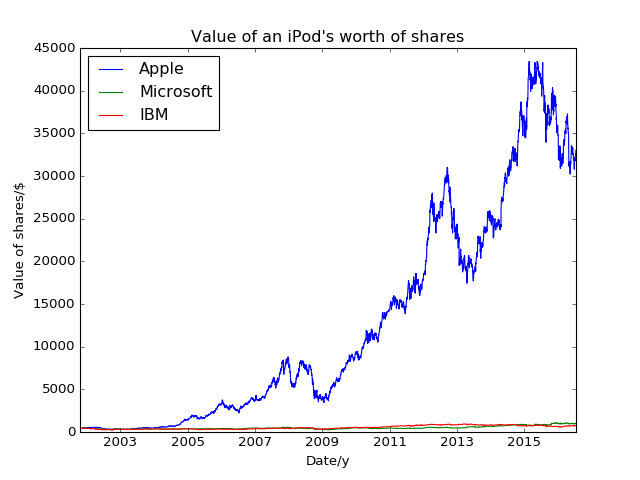

In [36]:
fig, ax = plt.subplots()
labels = ["Apple", "Microsoft", "IBM"]
for index,this_data in enumerate(data):
    ax.plot_date(pd.to_datetime(this_data.index, format='%Y-%m-%d %H:%M:%S.%f'), 399 * this_data["Adj Close"]/this_data["Adj Close"][-1], '-', label = labels[index])
plt.legend(loc = 2)
plt.ylabel("Value of shares/$")
plt.xlabel("Date/y")
ax.set_title("Value of an iPod's worth of shares")